# XGBoost

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

#### Read data

In [123]:
df = pd.read_csv('../../../datasets/parte2/treino/dataset_prepared.csv', na_filter=False)

In [124]:
replace_map = {'None':0, 'Low':1, 'Medium':2, 'High':3, 'Very High':4}

df['injection'] = df['injection'].replace(replace_map).astype(int)

#### X and y arrays

In [125]:
X = df.drop(['injection'], axis=1)
y = df['injection']

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

#### Training 

Using GridSearchCV to find the best hyperparameters

In [127]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5],
    #'min_child_weight': [5, 6, 7],
    'colsample_bytree': [0.7, 0.8, 0.9], # 0 ou 0,2 ou 0.7
    #'subsample': [0,7, 0.8, 0.9],
}

model = XGBClassifier(random_state=2023)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, refit=True, scoring='f1', cv=5, verbose=1, n_jobs=-1) # scoring='f1'
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2023, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='f1', verbose=1)

Inspect the best parameters

In [128]:
grid_search.best_params_ # {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100}

In [129]:
grid_search.best_score_ # 0.8831550040221814

nan

Get the best estimator

In [130]:
model = grid_search.best_estimator_

Get the predictions using the trained model

In [131]:
predictions = model.predict(X_test)

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

#### Model Evaluation

Classification report

In [132]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2377
           1       0.50      0.01      0.01       135
           2       0.59      0.53      0.56       316
           3       0.59      0.75      0.66       303
           4       0.79      0.52      0.63       174

    accuracy                           0.86      3305
   macro avg       0.68      0.56      0.56      3305
weighted avg       0.85      0.86      0.84      3305



Accuracy Score

In [133]:
accuracy_score(y_test, predictions) # 0.8910741301059002

0.8599092284417549

Confusion Matrix

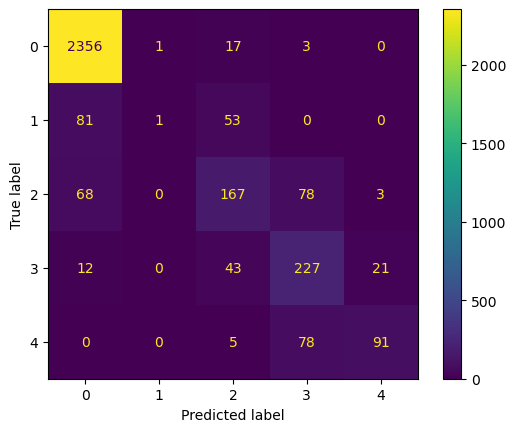

In [134]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [135]:
df_test = pd.read_csv('../../../datasets/parte2/teste/dataset_prepared.csv')
predictions_teste = model.predict(df_test)

/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/guilhermevarela/anaconda3/envs/DAA/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

In [136]:
df_predictions = pd.DataFrame({'Result': predictions_teste})
df_predictions['RowId'] = range(1, len(predictions_teste) + 1)
df_predictions = df_predictions[['RowId', 'Result']]

replace_map = { 0:'None', 1:'Low', 2:'Medium', 3:'High', 4:'Very High'} 

df_predictions['Result'] = df_predictions['Result'].replace(replace_map)

df_predictions.to_csv('../../../datasets/parte2/teste/kaggle-xgboost-cv10-wdescription.csv', index=False)